# **Proyek Analisis Data : Bike-sharing-dataset**


*   Nama : Refan Dinufalah
*   Email : M313B4KY3725@bangkit.academy

## **Menentukan Pertanyaan Bisnis**

#### 1.   Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda? ####
#### 2.   Kapan waktu peminjaman sepeda paling ramai berdasarkan hari dalam seminggu dan jam dalam sehari? ####
#### 3.   Bagaimana tren jumlah peminjaman sepeda berdasarkan musim? ####
#### 4.   Apakah ada korelasi antara suhu (temperature) dan jumlah peminjaman sepeda? ####


## **Menyiapkan Semua Library yang dibutuhkan**



In [30]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### **1. Data Wrangling**

#### **1.1 Gathering Data**


In [32]:
day = pd.read_csv('data/day.csv')
hour = pd.read_csv('data/hour.csv')

data = {'day': day,
        'hour': hour}

In [33]:
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan 5 data teratas dari tabel **day**

---



In [4]:
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Menampilkan 5 data teratas dari tabel **hour**

---



#### **1.2 Assesing Data**

##### **1.2.1 Periksa Semua Tipe Data** #####

In [5]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

Semua nilai telah terisi lengkap, tidak terdapat nilai kosong (*null value*) pada tabel **day** maupun **hour**

---

##### **1.2.2 Periksa Data Duplikat** #####

In [6]:
# Membuat dictionary untuk menyimpan jumlah duplikasi dan total sampel
duplicate_summary = {}
total_samples = {}

# Menghitung jumlah duplikasi dan total sampel untuk setiap DataFrame
for name, dataframe in data.items():
    duplicate_summary[name] = dataframe.duplicated().sum()  # Jumlah data duplikat
    total_samples[name] = len(dataframe)  # Total jumlah data

# Membuat DataFrame dari dictionary yang telah dibuat
duplicates_df = pd.DataFrame.from_dict(duplicate_summary, orient='index', columns=['Duplicate Count'])
samples_df = pd.DataFrame.from_dict(total_samples, orient='index', columns=['Total Sample Count'])

# Menggabungkan kedua DataFrame secara horizontal
result = pd.concat([samples_df, duplicates_df], axis=1)
result

,Total Sample Count,Duplicate Count
day,731,0
hour,17379,0


Setelah dianalisis dan mencari duplikasi ternyata tidak teridentifikasi / tidak terdapat duplikat **(duplicate_count = 0)** baik pada tabel **day** dan **hour**


---

##### **1.2.3 Periksa Nilai yang Hilang** #####

In [7]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

day 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

hour 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



Tidak terdapat nilai kosong (*null value*) pada tabel **day** maupun **hour**

#### **1.3 Data Cleaning**

##### **1.3.1 Day** #####

*   Pada tabel **day** tidak ada nilai yang kosong, maka dari itu tidak perlu ada nilai yang harus diisi



In [8]:
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
day['dteday'] = pd.to_datetime(day['dteday'])



*   Kolom **dteday** saat ini bertipe object. Diubah menjadi datetime untuk analisis waktu yang lebih mudah.

---





In [10]:
# Mapping weathersit ke deskriptif label
weather_mapping = {
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan Ringan',
    4: 'Hujan Berat'
}

In [11]:
day['weathersit'] = day['weathersit'].map(weather_mapping)



*   Kolom **weathersit** saat ini bertipe memiliki nilai deskriptif. Diubah
menjadi datetime untuk analisis waktu yang lebih mudah.

---

1.3.2 Hour


*   Pada tabel **hour** tidak ada nilai kosong sama seperti tabel **day**


In [12]:
print(hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
hour['dteday'] = pd.to_datetime(hour['dteday'])



*   Kolom **dteday** saat ini bertipe object. Diubah menjadi datetime untuk analisis waktu yang lebih mudah.

---

In [14]:
hour['weathersit'] = hour['weathersit'].map(weather_mapping)



*   Kolom **weathersit** saat ini bertipe memiliki nilai deskriptif. Diubah
menjadi datetime untuk analisis waktu yang lebih mudah.

---

### **2. Exploratory Data Analysis (EDA)**

#### 2.1 Explore Tabel **Day**

In [15]:
data["day"].sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
278,279,2011-10-06,4,0,10,0,4,1,Cerah,0.494167,0.480425,0.620833,0.134954,639,4126,4765
323,324,2011-11-20,4,0,11,0,0,0,Mendung,0.463333,0.457058,0.684583,0.185950,787,2733,3520
474,475,2012-04-19,2,1,4,0,4,1,Cerah,0.498333,0.493046,0.612500,0.065929,846,5719,6565
376,377,2012-01-12,1,1,1,0,4,1,Mendung,0.382500,0.381938,0.802917,0.180967,269,3828,4097
328,329,2011-11-25,4,0,11,0,5,1,Cerah,0.375000,0.380671,0.643750,0.098896,1095,1697,2792


2.1.1 Menghitung jumlah total peminjaman sepeda (cnt) berdasarkan musim (season):

In [16]:
day.groupby(by="season")['cnt'].sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

2.1.2 Menghitung jumlah total peminjaman sepeda (cnt) berdasarkan bulan (mnth):

In [17]:
day.groupby(by="mnth")['cnt'].sum().sort_values(ascending=False)


mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

2.1.3 Menghitung jumlah unik hari (dteday) dalam setiap kategori cuaca (weathersit):

In [18]:
day.groupby(by="weathersit")['dteday'].nunique().sort_values(ascending=False)


weathersit
Cerah           463
Mendung         247
Hujan Ringan     21
Name: dteday, dtype: int64

### 2.2 Explore Tabel **Hour**

In [19]:
data["hour"].sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5115,5116,2011-08-06,3,0,8,1,0,6,0,Cerah,0.66,0.6061,0.78,0.1642,17,50,67
8043,8044,2011-12-06,4,0,12,19,0,2,1,Hujan Ringan,0.46,0.4545,1.00,0.2985,10,223,233
5038,5039,2011-08-02,3,0,8,20,0,2,1,Mendung,0.82,0.7576,0.46,0.2537,40,248,288
5368,5369,2011-08-16,3,0,8,14,0,2,1,Cerah,0.76,0.6818,0.45,0.4179,65,117,182
9777,9778,2012-02-17,1,1,2,8,0,5,1,Mendung,0.26,0.3030,1.00,0.0000,4,516,520


2.2.1 Menghitung jumlah total peminjaman sepeda (cnt) berdasarkan jam (hr):

In [20]:
hour.groupby(by="hr")['cnt'].sum().sort_values(ascending=False)


hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

2.2.2 Menghitung jumlah total peminjaman sepeda (cnt) berdasarkan hari dalam seminggu (weekday):

In [21]:
hour.groupby(by="weekday")['cnt'].sum().sort_values(ascending=False)


weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

2.2.3 Menghitung jumlah total peminjaman sepeda (cnt) berdasarkan kategori cuaca (weathersit):

In [22]:
hour.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False)


weathersit
Cerah           2338173
Mendung          795952
Hujan Ringan     158331
Hujan Berat         223
Name: cnt, dtype: int64

2.2.4 Menghitung jumlah unik jam (hr) berdasarkan musim (season):

In [23]:
hour.groupby(by="season")['hr'].nunique().sort_values(ascending=False)


season
1    24
2    24
3    24
4    24
Name: hr, dtype: int64

### 2.3 Explore Day & Hour

In [24]:
# Mengagregasi data hour menjadi data harian berdasarkan tanggal (dteday)
hourly_aggregated = hour.groupby('dteday').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum',
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()


In [25]:
# Merge data day dengan data agregasi dari hour berdasarkan dteday
merged_data = pd.merge(day, hourly_aggregated, on='dteday', suffixes=('_day', '_hour'))


In [26]:
print(merged_data.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

  weathersit  temp_day  ...  casual_day  registered_day  cnt_day  cnt_hour  \
0    Mendung  0.344167  ...         331             654      985       985   
1    Mendung  0.363478  ...         131             670      801       801   
2      Cerah  0.196364  ...         120            1229     1349      1349   
3      Cerah  0.200000  ...         108            1454     1562      1562   
4      Cerah  0.226957  ...          82            1518     1600      1600   

   casual_hour  registered_hour  temp_hour  atemp_hour  hum_hour  \
0          331          

## 3. Visualization & Explanatory Analysis

##### **3.1 Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?** #####

In [27]:
import seaborn as sns

# Pertanyaan 1: Pengaruh cuaca terhadap jumlah peminjaman sepeda
weather_mapping = {1: "Clear/Partly Cloudy", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
day_data['weather_desc'] = day_data['weathersit'].map(weather_mapping)

# Agregasi data
weather_effect = day_data.groupby('weather_desc')['cnt'].mean().sort_values()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_effect.index, y=weather_effect.values)
plt.title("Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'day_data' is not defined

##### **3.2 Kapan waktu peminjaman sepeda paling ramai berdasarkan hari dalam seminggu dan jam dalam sehari?** #####

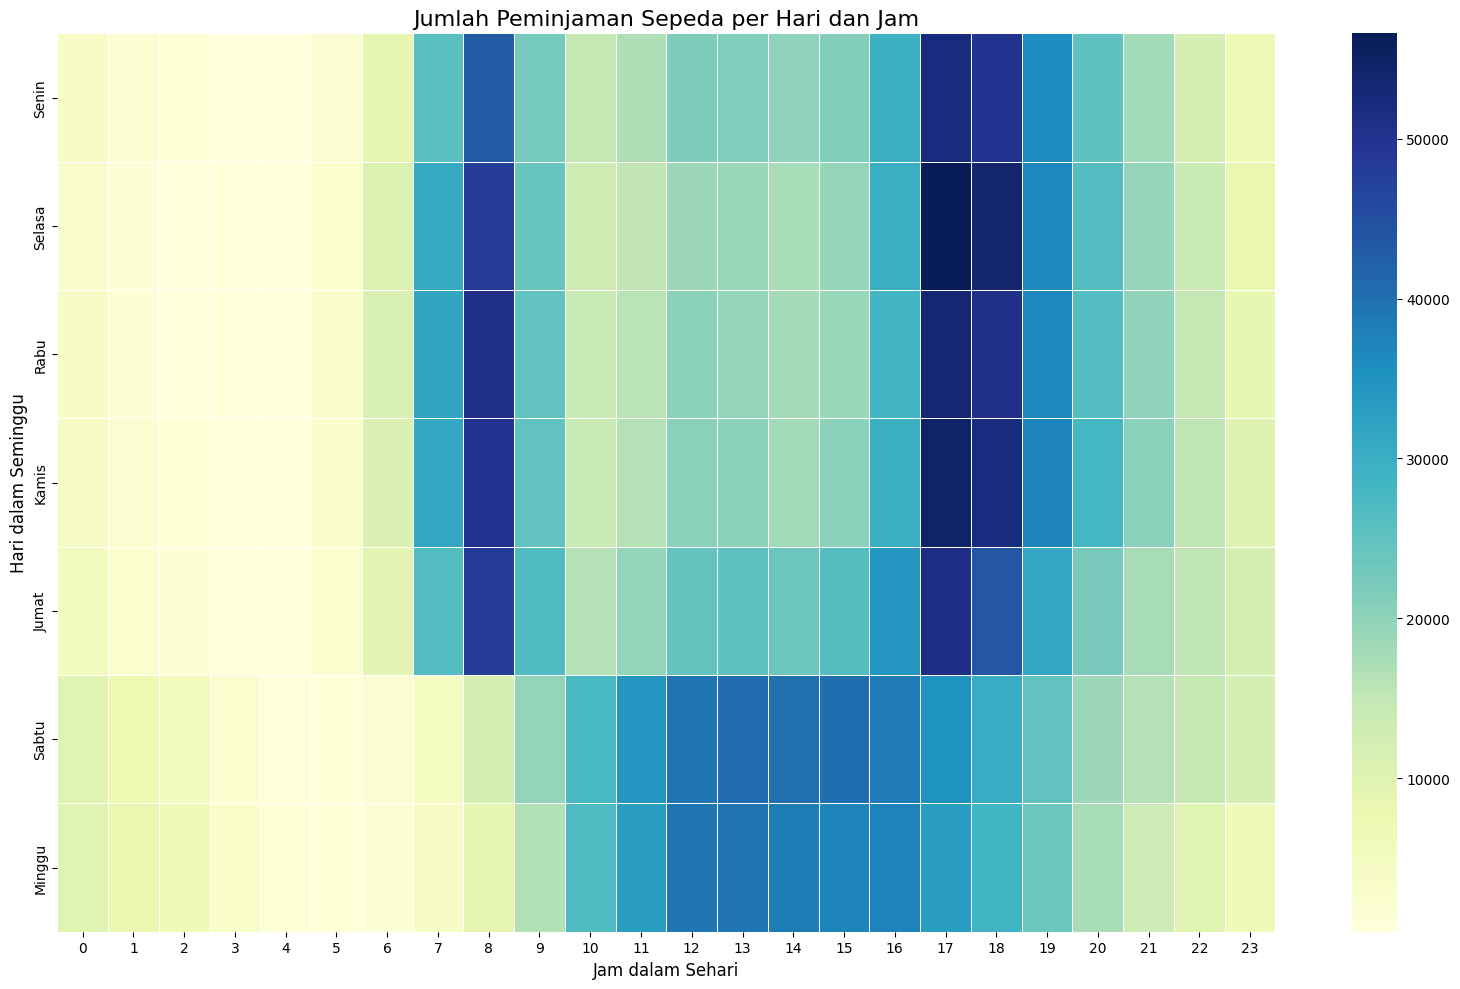

In [29]:
# Memetakan angka hari ke nama hari
day_mapping = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

hour['weekday_name'] = hour['weekday'].map(day_mapping)

# Heatmap: Peminjaman berdasarkan hari dan jam
pivot_hour = hour.pivot_table(index='weekday_name', columns='hr', values='cnt', aggfunc='sum')
pivot_hour = pivot_hour.reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_hour, cmap='YlGnBu', annot=False, fmt='.0f', linewidths=.5)
plt.title('Jumlah Peminjaman Sepeda per Hari dan Jam', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Hari dalam Seminggu', fontsize=12)
plt.tight_layout()
plt.show()

## 4. **Penerapan Teknik Analisis Lanjutan**

##### **4.1 RFM Analysis** #####

RFM (Recency, Frequency, Monetary) analysis sering digunakan dalam konteks analisis pelanggan untuk mengidentifikasi perilaku pelanggan berdasarkan tiga dimensi:

*   Recency: Seberapa baru transaksi terakhir pengguna.
*   Frequency: Seberapa sering pengguna melakukan transaksi.
*   Monetary: Total nilai transaksi yang dilakukan oleh pengguna.

Dalam konteks data peminjaman sepeda, kita dapat mengadaptasi konsep RFM:

*   Recency: Hari terakhir pengguna meminjam sepeda.
*   Frequency: Jumlah total peminjaman sepeda oleh pengguna.
*   Monetary: Total durasi atau jumlah peminjaman sepeda.

In [60]:
day['dteday'] = pd.to_datetime(day['dteday'])

# Assume user_id is 'instant' for the sake of analysis
day['user_id'] = day['instant']

# Reference date for Recency calculation
reference_date = day['dteday'].max() + pd.Timedelta(days=1)

# Calculate RFM
rfm_df = day.groupby('user_id').agg({
    'dteday': lambda x: (reference_date - x.max()).days,
    'user_id': 'count',
    'cnt': 'sum'
}).reset_index(drop=True) # Drop the existing index to avoid the error

rfm_df.columns = ['Recency', 'Frequency', 'Monetary'] # Adjust column names accordingly

# Print RFM dataframe
print(rfm_df)

     Recency  Frequency  Monetary
0        731          1       985
1        730          1       801
2        729          1      1349
3        728          1      1562
4        727          1      1600
..       ...        ...       ...
726        5          1      2114
727        4          1      3095
728        3          1      1341
729        2          1      1796
730        1          1      2729

[731 rows x 3 columns]


##### **4.3 Clusterring** #####

Setelah kita memiliki data RFM, kita dapat melakukan clustering untuk mengidentifikasi kelompok pengguna yang serupa.

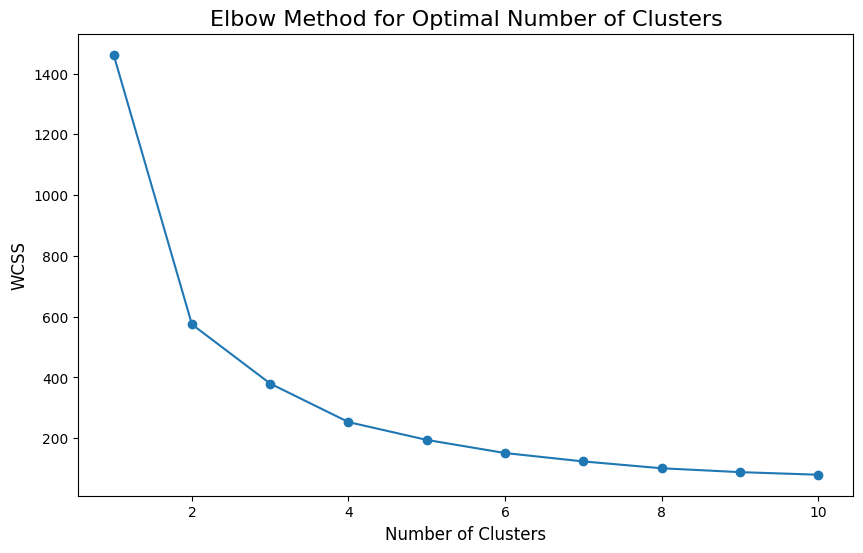

     Recency  Frequency  Monetary  Cluster
0        731          1       985        2
1        730          1       801        2
2        729          1      1349        2
3        728          1      1562        2
4        727          1      1600        2
..       ...        ...       ...      ...
726        5          1      2114        0
727        4          1      3095        1
728        3          1      1341        0
729        2          1      1796        0
730        1          1      2729        1

[731 rows x 4 columns]


In [106]:
# Konversi kolom 'dteday' menjadi tipe datetime 
day['dteday'] = pd.to_datetime(day['dteday'])
day['user_id'] = day['instant'] # Kolom user_id untuk identifikasi pelanggan

# Tentukan tanggal referensi untuk perhitungan Recency
reference_date = day['dteday'].max() + pd.Timedelta(days=1)

# Menghitung RFM (Recency, Frequency, Monetary)
rfm_df = day.groupby('user_id').agg({
    'dteday': lambda x: (reference_date - x.max()).days, # Recency: Jarak hari sejak transaksi terakhir
    'user_id': 'count', # Frequency: Jumlah transaksi
    'cnt': 'sum' # Monetary: Total nilai transaksi
}).reset_index(drop=True)

# Ubah nama kolom agar lebih jelas
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

# Standarisasi data RFM menggunakan StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']]) # Standarisasi kolom RFM

# Menentukan jumlah cluster optimal menggunakan metode Elbow
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.show()

# Membuat clustering dengan jumlah cluster optimal
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cetak DataFrame RFM dengan hasil clustering
print(rfm_df)

In [68]:
rfm_df.head(10)

,Recency,Frequency,Monetary,Cluster
0,731,1,985,2
1,730,1,801,2
2,729,1,1349,2
3,728,1,1562,2
4,727,1,1600,2
5,726,1,1606,2
6,725,1,1510,2
7,724,1,959,2
8,723,1,822,2
9,722,1,1321,2


Cluster di atas dapat diinterpretasikan sebagai berikut:


*   Cluster 0: Pengguna yang cenderung melakukan transaksi dengan jumlah Monetary yang menengah. Mereka cenderung memiliki Recency yang lebih tinggi, menunjukkan bahwa mereka telah melakukan transaksi lebih lama.
*   Cluster 1: Pengguna dengan Monetary yang lebih tinggi dan Recency yang lebih rendah. Ini adalah pengguna yang relatif baru dan melakukan transaksi dengan jumlah uang yang besar.
*   Cluster 2: Pengguna dengan Monetary yang lebih rendah dan Recency yang lebih tinggi. Mereka adalah pengguna yang sudah lama melakukan transaksi tetapi dengan jumlah yang lebih kecil.


## **5. Kesimpulan**




*   Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda
      Berdasarkan visualisasi data, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda:

      1. Cuaca Cerah dan Berawan: Jumlah peminjaman sepeda cenderung lebih tinggi ketika cuaca baik, yaitu pada kondisi cuaca cerah atau sedikit berawan. Ini dapat dilihat dari distribusi peminjaman yang lebih tinggi pada kategori weathersit 1 dan 2, yang merepresentasikan cuaca cerah hingga berawan.
      2. Cuaca Buruk: Pada kondisi cuaca buruk (kategori weathersit 3 dan 4, yang mencakup berawan tebal hingga hujan lebat), jumlah peminjaman sepeda menurun signifikan. Ini menunjukkan bahwa cuaca buruk berdampak negatif terhadap jumlah peminjaman sepeda.

*   Waktu Peminjaman Sepeda Paling Ramai berdasarkan Hari dalam Seminggu dan Jam dalam Sehari

      1. Hari Kerja vs. Akhir Pekan: Peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Ini mungkin disebabkan oleh penggunaan sepeda sebagai alat transportasi untuk bekerja atau keperluan lain selama hari kerja.
      2. Jam Sibuk: Pada hari kerja, terdapat dua puncak utama dalam peminjaman sepeda:

        *   Pagi hari (sekitar pukul 7-9): Waktu ini mungkin terkait dengan perjalanan orang ke tempat kerja atau sekolah.

        *  Sore hari (sekitar pukul 17-19): Waktu ini kemungkinan besar terkait dengan perjalanan pulang dari tempat kerja atau sekolah.
      3. Akhir Pekan: Peminjaman sepeda pada akhir pekan lebih merata sepanjang hari, dengan sedikit peningkatan pada siang hari. Ini menunjukkan penggunaan sepeda lebih untuk rekreasi atau aktivitas santai.


*   Dari analisis RFM dan clustering, kita dapat menyimpulkan bahwa:

    1.   Pengguna dibagi menjadi tiga kelompok utama berdasarkan perilaku mereka:

        *   Pengguna lama dengan transaksi jumlah menengah.
        *   Pengguna baru dengan transaksi jumlah tinggi.
        *   Pengguna lama dengan transaksi jumlah rendah.

    2.   Strategi pemasaran dapat disesuaikan untuk masing-masing kelompok:

        *   Cluster 0: Mungkin perlu penawaran khusus untuk mengaktifkan kembali pengguna lama yang memiliki potensi nilai transaksi yang menengah.
        *   Cluster 1: Fokus pada retensi pengguna dengan menawarkan program loyalitas atau insentif tambahan untuk mempertahankan mereka.
        *   Cluster 2: Dapat diberikan promosi atau diskon untuk meningkatkan jumlah transaksi mereka.















